In [1]:
import numpy as np
import pandas as pd 
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
data = pd.read_csv('seattle-weather.csv')

In [2]:
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [3]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [5]:
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [6]:
data['date'] = pd.to_datetime(data['date'])

In [7]:
X = data.drop(columns=['weather', 'date'])  # Drop target and unnecessary columns
y = data['weather']

In [8]:
le = LabelEncoder()
y = le.fit_transform(y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [10]:
rf_model = RandomForestClassifier(random_state=69, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=69)

In [11]:
y_pred = rf_model.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.83


In [13]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.05      0.07        22
           1       0.26      0.11      0.15        55
           2       0.97      0.91      0.94       324
           3       0.60      0.46      0.52        13
           4       0.77      0.94      0.84       317

    accuracy                           0.83       731
   macro avg       0.55      0.49      0.51       731
weighted avg       0.80      0.83      0.81       731



In [14]:
feature_importances = rf_model.feature_importances_
feature_names = X.columns

In [15]:
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

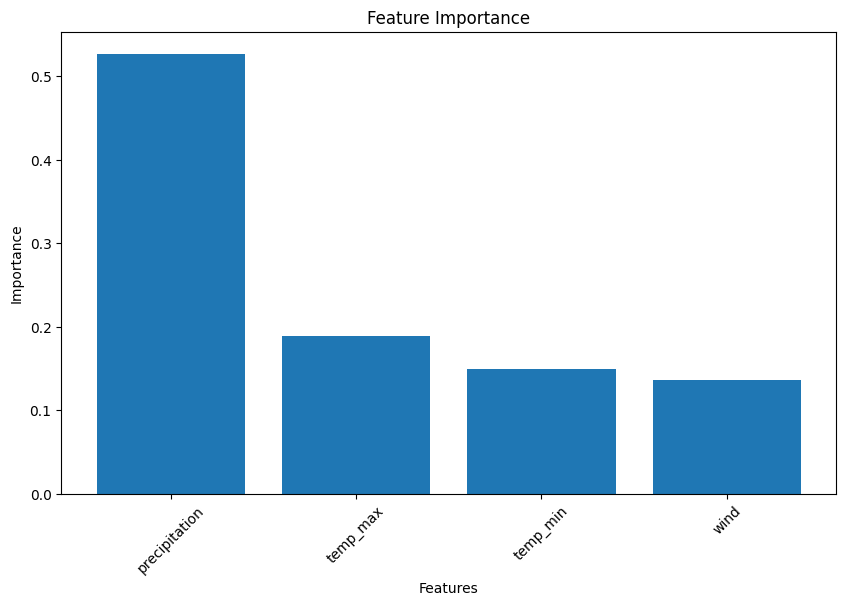

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

In [17]:
import numpy as np
sample_input = np.array([[0.5,11.7,	7.2	,2.]])  # [precipitation, temp_max, temp_min, wind]

prediction = rf_model.predict(sample_input)

predicted_label = le.inverse_transform(prediction)  
# Print the result
print(f"Predicted Weather: {predicted_label[0]}")

Predicted Weather: rain


c:\Users\PC-SON\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [18]:
import joblib
# Random Forest model doesnt support lib for .h5 file to save
# use joblib for .pkl file save 
joblib.dump(rf_model, 'weather_prediction.pkl')

from IPython.display import FileLink
FileLink('weather_prediction.pkl')

print("Model saved as weather_prediction.pkl")

Model saved as weather_prediction.pkl
